<a href="https://colab.research.google.com/github/byundonghwan/maching_learning_basic/blob/main/%EC%84%A0%ED%98%95_%EB%B6%84%EB%A5%98_%EC%9D%B4%EB%A1%A0_%EB%B0%8F_%EC%8B%A4%EC%8A%B5_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
iris = datasets.load_iris() # sklearn의 빌트인 iris 예제 
print(list(iris.keys())) # iris 데이터 key 값

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']


In [2]:
x = iris['data'][:, 3:] # 꽃입의 너비 변수만 사용.
y = (iris['target'] == 2).astype('int') # index = 2 " versinica만 사용."

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x,y)

LogisticRegression()

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x_new = np.linspace(0, 3, 1000).reshape(-1, 1)
x_new.shape

(1000, 1)

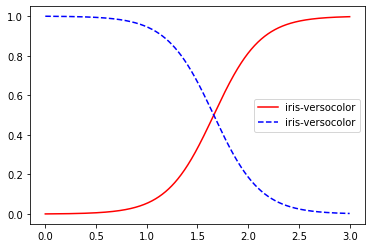

In [4]:
# 로지스틱 회기 예측.
y_proba = log_reg.predict_proba(x_new)
y_proba # 첫 번쨰 col는 versocolor일 확률, 두 번째 col는 versinicar가 아닌 확률.
plt.plot(x_new, y_proba[:, 1], 'r-', label = 'iris-versocolor')
plt.plot(x_new, y_proba[:, 0], 'b--', label = 'iris-versocolor')
plt.legend()
plt.show()

In [5]:
# 소프트 맥스 회귀
x = iris['data'][:, (2,3)] # 꽃잎의 길이, 너비 변수를 사용
y = iris['target'] # 3개 모든 클래스 사용.=> 각 클래스별 추정 확률 값이 가장 높은 클래스를 활용.

# C => L2 규제화를 뜻함, 릿지 규제 사용.
softmax_reg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs' ,C = 10, random_state = 2021)
softmax_reg.fit(x, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=2021)

In [6]:
# 예측.
new_iris = [[5,2]] # 꽃잎 길이 변수 = 5, 너비 변수 = 2 데이터를 예측한다고 가정.

# 가장 큰 index를 반환하는 것 predict() 메소드, 모든 확률을 다 제공해주는 것 predict_proba()메소드. 
prediction = softmax_reg.predict(new_iris)[0]
label = iris['target_names'].tolist()
print(label[prediction]) # 예측 결과 

virginica


In [7]:
# 서포트 벡터 SVM 선형 모델 예측.
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris() # 사이킷런 빌트인 iris 예제 데이터 로드
x = iris['data'][:, (2, 3)] # 꽃잎의 길이, 너비 변수 사용
y = (iris['target'] == 2).astype('int') # index = 2 : Versinica

# 사이킷런의 파이프라인 라이브러리를 통해서 데이터 스케일과 모델 적합을 한번에 처리.
svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss= 'hinge'))
])

# 모델 훈련
svm_clf.fit(x, y)

# 꽃잎 길이 5.5cm, 너비 1.7cm의 iris 데이터를 예측한다고 가정.
new_iris = [[5.5, 1.7]]
prediction = svm_clf.predict(new_iris)[0]
print(prediction) # Versinica : True(1)

1


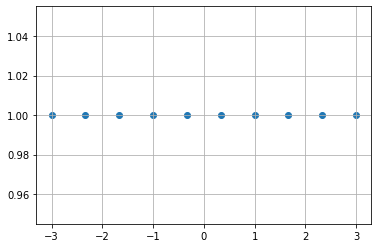

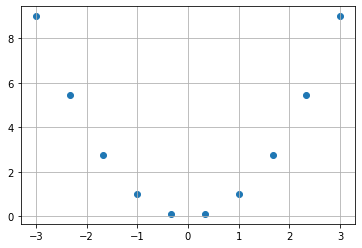

In [8]:
import matplotlib.pyplot as plt
x = np.linspace(-3, 3, 10)
y = np.linspace(1, 1, 10)
plt.scatter(x, y)
plt.grid()
plt.show()

b_func = x**2
plt.scatter(x, b_func)
plt.grid()
plt.show()

In [9]:
# 서포트 벡터 SVM 비선형 모델 예측.
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC

# 샘플 수 1000개, noise값 0.1, random_State = 2021
x, y = make_moons(n_samples = 1000, noise = 0.1, random_state = 2021)

# 변수변환 : polynomial 3차 다항식 사용, scaler : StandardScaler 사용, 모델 : LinearSvm(c=10, loss = 'hinge) 사용
polynomial_std_svm = Pipeline([
    ("polynomial", PolynomialFeatures(degree = 3)),
    ("std", StandardScaler()),
    ("svm", LinearSVC(C = 10, loss = 'hinge'))
])

# 모델 학습
polynomial_std_svm.fit(x, y)

# 첫 번쨰 변수값 : 2.0, 두 번쨰 변수값: 1.0인 새로운 데이터 예측
new_moon = [[2.0, 1.0]]
polynomial_std_svm.predict(new_moon)


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([1])

In [10]:
# 서포트 벡터 SVM 다항식 커널 사용.
from sklearn.svm import SVC
# kernel = 'poly(degree = 3)' 사용
# 매개변수 coef0는 모델이 높은 차수와 낮은 차수에 얼마나 영향을 받을지 조절하는 것
# coef0을 적절한 값으로 지정하면 고차항의 영향을 줄일 수 있다.

poly_kernel_std_svm = Pipeline([
    ("std", StandardScaler()),
    ("poly_kernel_svm", SVC(kernel = 'poly', degree = 3, coef0 = 1, C = 5))
])
poly_kernel_std_svm.fit(x, y)

Pipeline(steps=[('std', StandardScaler()),
                ('poly_kernel_svm', SVC(C=5, coef0=1, kernel='poly'))])

In [11]:
# 서포트 벡터 가우시안 RBF 커널 사용.

# 하이퍼파라미터 r는 규제 역할을 한다.
# (모델이 과적합일 경우 => r 감소시키고, 모델 과소적합일 경우 => r 증가시켜야함.)
# 하이퍼파라미터 C도 r(gamma)와 비슷한 성격을 띈다.
rbf_kernel_std_svm = Pipeline([
    ('std', StandardScaler()),
    ('rbf_kernel_svm', SVC(kernel = 'rbf', gamma = 3, C = 0.001))
])

# 모델 학습
rbf_kernel_std_svm.fit(x, y)

Pipeline(steps=[('std', StandardScaler()),
                ('rbf_kernel_svm', SVC(C=0.001, gamma=3))])